### House Price Prediction

##### Imports

In [200]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### Data Preprocessing

In [201]:
data = pd.read_csv('./dataset/Housing.csv')

In [202]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [203]:
# Null validation
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [204]:
# Data type validation
data.dtypes

# Data Transformation Challenge:
# Categorical columns ('mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus') 
# need to be converted to numerical formats for linear regression.

# These should be converted to numerical formats using techniques like One-Hot Encoding or Label encoding.

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [205]:
# One-hot encodig
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    data[col] = data[col].map({'yes': 1, 'no': 0})

furnishingstatus_mapping = {'furnished': 1, 'semi-furnished': 2, 'unfurnished': 3}
data['furnishingstatus'] = data['furnishingstatus'].map(furnishingstatus_mapping)

In [206]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


#### Scalate feaures and train split

In [207]:
# Separate the target variable from the independent variables

X = data.drop('price', axis=1) # Dependent variables
y = data['price']              # Target Variable

In [208]:
# Split the dataset into test and training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [209]:
# Apply standardization only to independent variables

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Apply ML algorithm

In [210]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [211]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [212]:
# Evaluation on the training set
print("Training - R²:", model.score(X_train, y_train))
print("Training - MSE:", mean_squared_error(y_train, y_train_pred))
print("Training - MAE:", mean_absolute_error(y_train, y_train_pred))
print("\n")

# Evaluation on the test set
print("Test - R²:", model.score(X_test, y_test))
print("Test - MSE:", mean_squared_error(y_test, y_test_pred))
print("Test - MAE:", mean_absolute_error(y_test, y_test_pred))


Training - R²: 0.6833720656323935
Training - MSE: 1118514551087.0127
Training - MAE: 775698.3571880185


Test - R²: 0.6541478826026099
Test - MSE: 1147642991148.405
Test - MAE: 813507.2295340709


#### Predict the price

In [213]:
# Make sure to use the same codes you used in your original encoding

house = pd.DataFrame({
    'area': [3850],
    'bedrooms': [3],
    'bathrooms': [2],
    'stories': [2],
    'mainroad': [1],
    'guestroom': [0],
    'basement': [0],
    'hotwaterheating': [0],
    'airconditioning': [1],
    'parking': [0],
    'prefarea': [1],
    'furnishingstatus': [2]  
})

# Scaling
new_house_scaled = scaler.transform(house)

# Predict the price
predicted_price = model.predict(new_house_scaled)
price = int(round(predicted_price[0], 0))
print("Predicted price for the house:", price)



Predicted price for the house: 6044143


#### Data Visualization

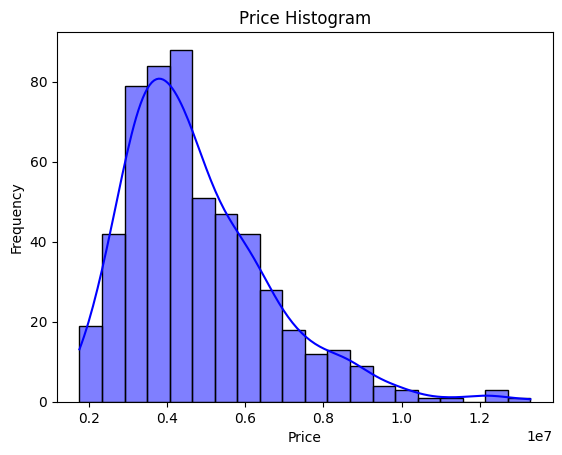

In [214]:
# This graph allows you to understand the distribution of house prices in your dataset. 
# It helps you identify whether prices follow a normal distribution or if there are outliers that need to be considered.

sb.histplot(data['price'], bins=20, color='blue', edgecolor='black', kde=True)

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Histogram')

plt.show()


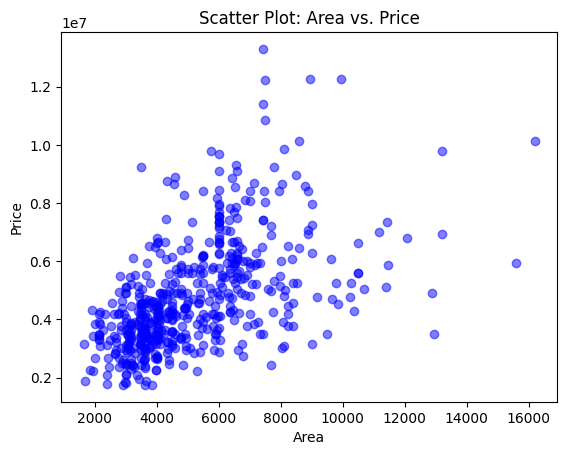

In [215]:
# Scatter plot of "area" vs. "price" will show you how property size affects the price.

# Between 'area' and 'price'
plt.scatter(data['area'], data['price'], color='blue', alpha=0.5)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter Plot: Area vs. Price')

plt.show()

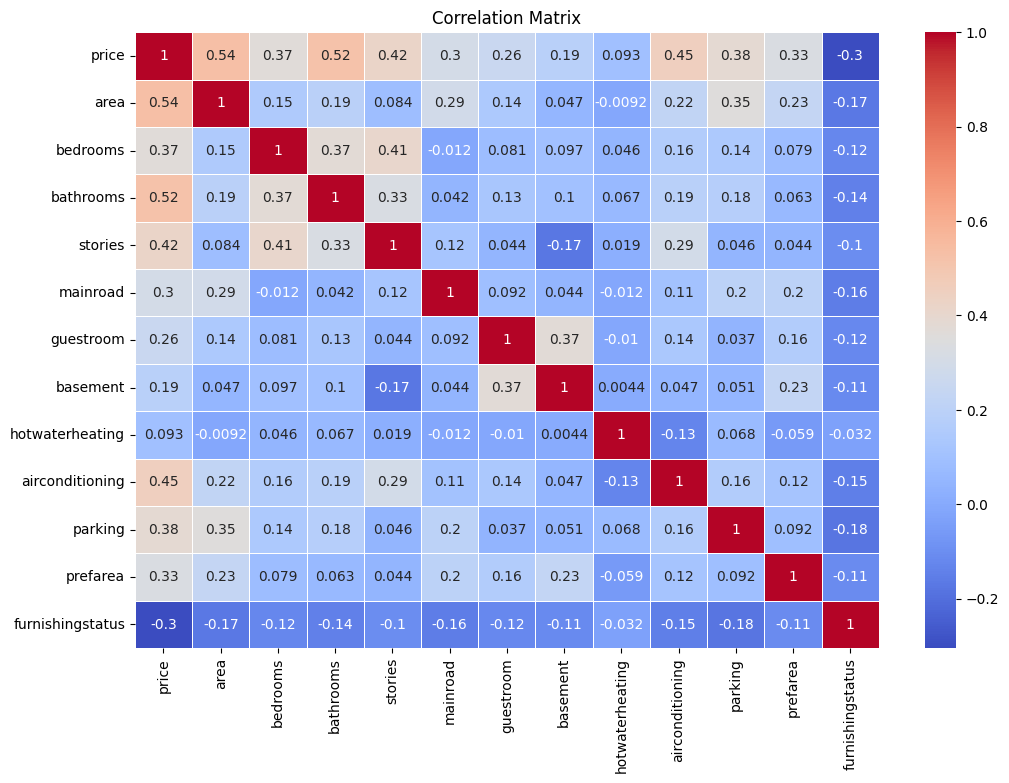

In [216]:
# This graph provides information about the correlations between all the features in your dataset. 
# It is especially useful for identifying which features have a strong or weak relationship with the price.

# Create a correlation matrix
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')

plt.show()